In [2]:
import pandas as pd

df=pd.read_csv("/content/crop-recommendation.csv")

df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
298,40,58,75,18.591908,14.779596,7.168096,89.609825,chickpea
1709,69,64,47,40.211993,94.507669,6.993473,186.676232,papaya
322,22,70,19,18.237757,21.076433,5.515615,69.449516,kidneybeans
808,13,64,20,19.134577,62.575269,6.590571,36.469470,lentil
159,63,35,16,22.027210,65.355499,6.272418,83.732801,maize


In [5]:
df.shape

(2200, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


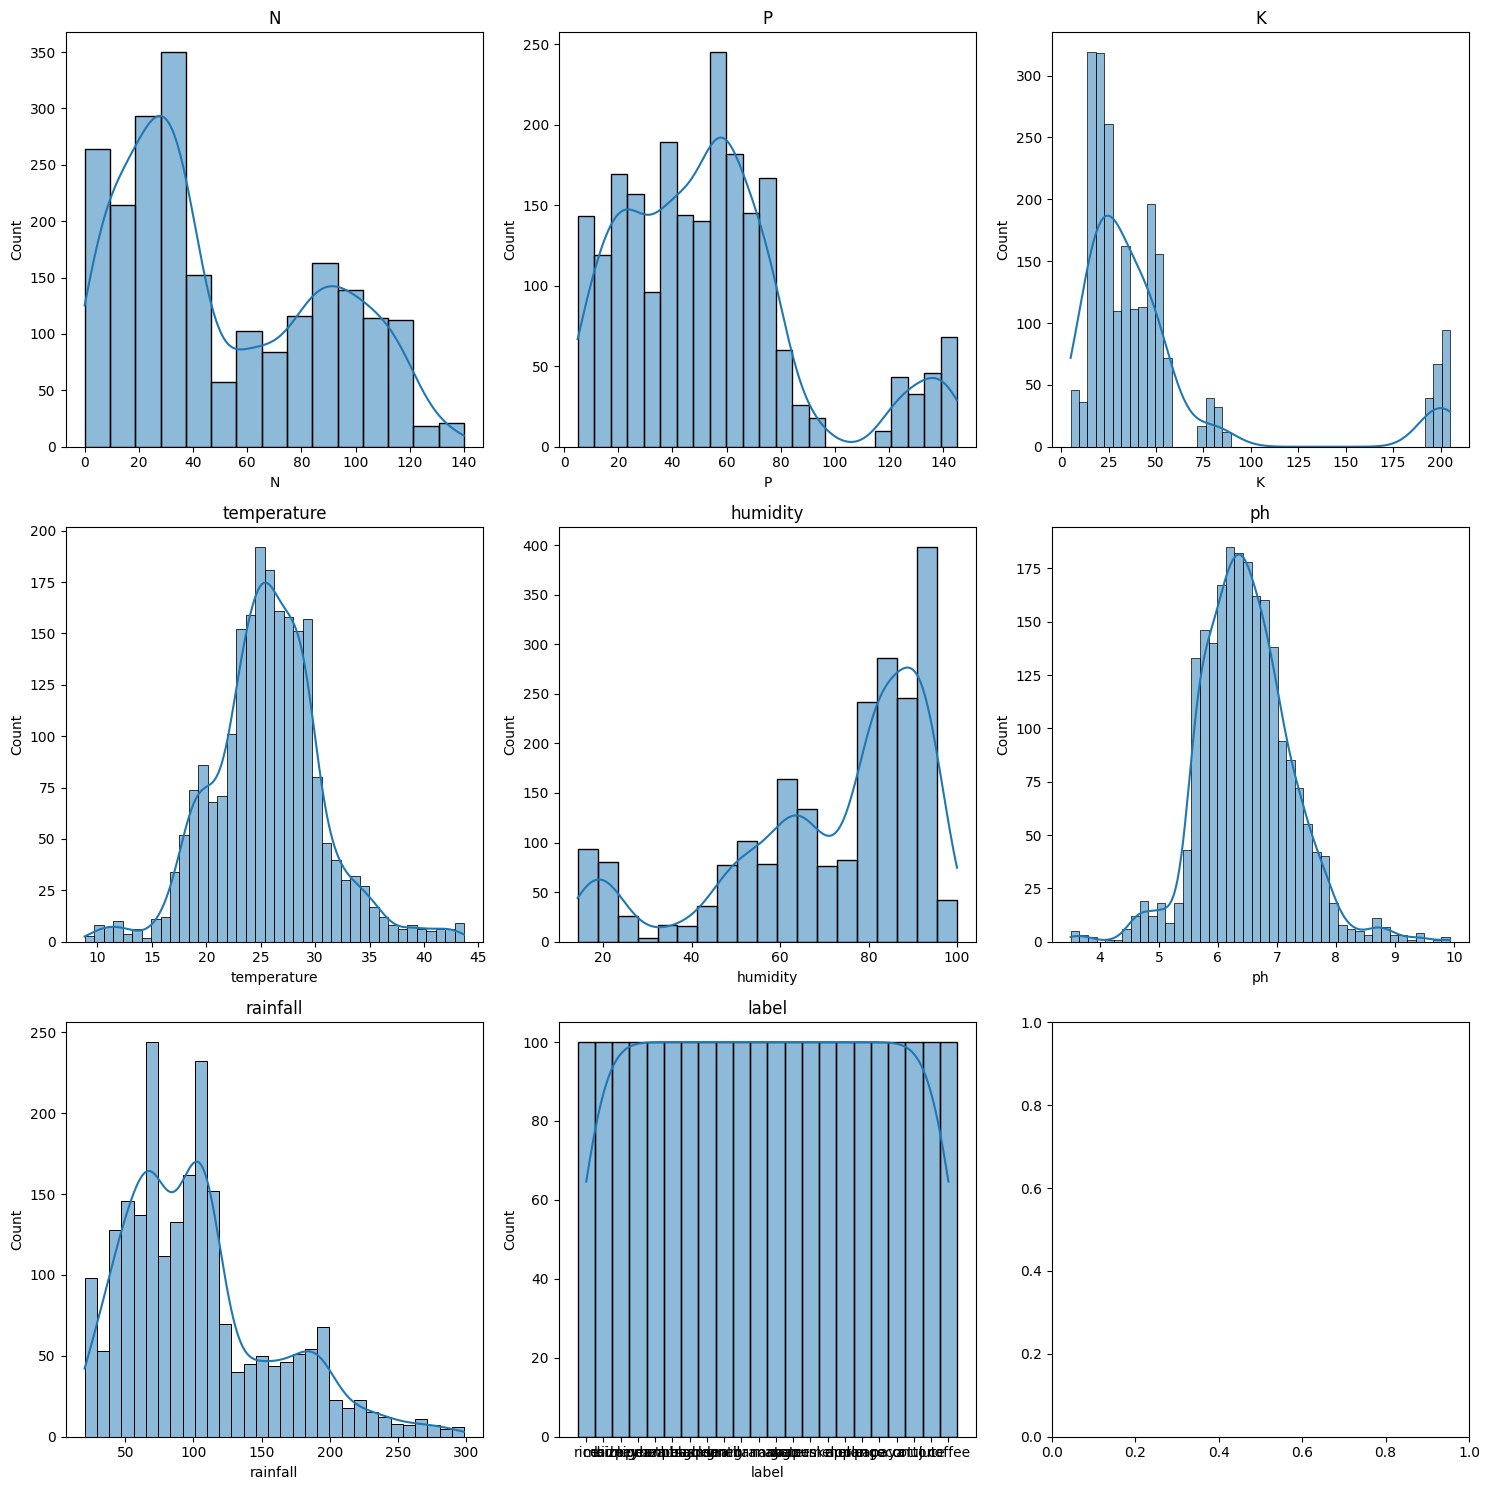

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for idx, feature in enumerate(features):
    row, col = divmod(idx, 3)
    sns.histplot(df[feature], ax=ax[row, col], kde=True)
    ax[row, col].set_title(feature)

plt.tight_layout()
plt.show()



In [12]:
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


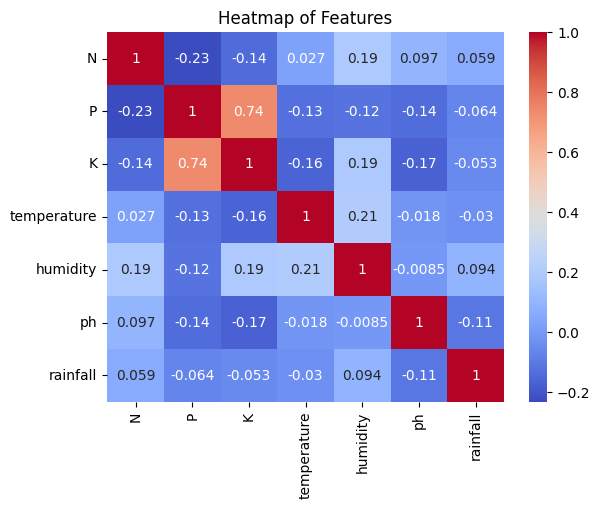

In [13]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.title("Heatmap of Features")
plt.show()

In [16]:
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

In [17]:
df['crop_no'] = df['label'].map(crop_dict)

In [30]:
df.drop(  'label', axis=1, inplace=True)

In [31]:

df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [32]:
x=df.iloc[:,:-1]

In [33]:
y=df.iloc[:,-1]

In [34]:
x.shape

(2200, 7)

In [35]:
y.shape

(2200,)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [37]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf3 = LogisticRegression(max_iter=1000)
clf4 = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[
    ('rf', clf1), ('gb', clf2), ('lr', clf3), ('svc', clf4)],
    voting='soft')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Voting Classifier Accuracy: 0.990909090909091
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        19
           2       1.00      1.00      1.00        21
           3       0.88      1.00      0.94        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00        20
          17       1.00      1.00  

In [41]:
def crop_recommend(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed = sc.transform(features)
    predicted_label =voting_clf.predict(transformed)[0]

    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
        8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
        14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
        19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
    }

    crop_name = crop_dict.get(predicted_label, "Unknown Crop")
    return f"{crop_name} is the best crop to be cultivated."


In [42]:
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Rice is the best crop to be cultivated.'

In [43]:
import pickle
pickle.dump(voting_clf, open('crop_model.sav', 'wb'))
pickle.dump(sc, open('crop_scaler.sav', 'wb'))

In [44]:
voting_classifier= pickle.load(open('crop_model.sav', 'rb'))
sc = pickle.load(open('crop_scaler.sav', 'rb'))

In [45]:
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Rice is the best crop to be cultivated.'